<a href="https://colab.research.google.com/github/MateoProjects/DeepLearning/blob/master/Deep_Learning_First_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


* Softmax : algorisme d'activació. Aquesta funció té una característica i és que la seva predicció o estarà proper a 1 i la resta de valors a 0

* Sigmoid : Funció que retorna o 1 o 0 a partir d'una formula. Que és: z = b + sum(x * w) => y = 1 si z >= 0 else 0 si z < 0 
 
![Neurona IA amb sigmoi](https://www.xeridia.com/sites/default/files/contenidos/blog/neurona_artificial.jpg)


* Amb softmax :

![Sigmoid i Softmax](http://torres.ai/wp-content/uploads/2018/06/PictureMLP2.png)




Imatge d'entranament
Resultat que hauria de retornar la IA entrenada
1


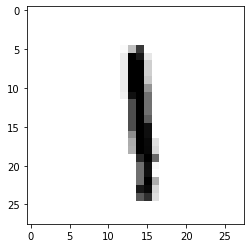

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


#Agafo el dataset mnist
mnist = tf.keras.datasets.mnist

#carrego les dades del dataset
#x_train , y_train son el conjunt de dades d'entrenament i x_test i y_test les de prova
(x_train , y_train), (x_test , y_test) = mnist.load_data() 
#Amb aquesta comanda puc veure la imatge 8 que hem pre carregat

print("Imatge d'entranament")
plt.imshow(x_train[8] , cmap=plt.cm.binary)

print("Resultat que hauria de retornar la IA entrenada")
print(y_train[8])

In [ ]:
#Puc mirar ara per exemple la dimensió de x i de i

print("Shape de x : ", x_train.shape)
print("Shape de y : ", y_train.shape)
print("Dimensió de x : " , x_train.ndim)
print("Dimensió de y : " , y_train.ndim)
print("Tipus de x : " , x_train.dtype)
print("Tipus de y : " , y_train.dtype)

Shape de x :  (60000, 28, 28)
Shape de y :  (60000,)
Dimensió de x :  3
Dimensió de y :  1
Tipus de x :  uint8
Tipus de y :  uint8


En alguns casos ens interesarà canviar els valors de les entrades a un altre que s'explica més endavant.  En aquest pas es converteix x_train a y_train a floats

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Ara mateix tinc una matriu de 28x28 . La red neuronal però sols accepta vectors de 1D per tant he de convertir aquesta matriu a un vector de 784

In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

Ara tinc la y com a valor , però necessito convertir les etiquetes en vectors de 0 i 1 on sols tindré un 1 al valor que representi . Per exemple si la y = 1 => [0,1,0,0,0,0,0,0,0,0] . Per fer això utilitzaré el categorical de keras.

In [ ]:
from tensorflow.keras.utils import to_categorical
print("y_test before categorical : ",y_test[0])
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
print("y_test after categorical : ",y_test[0])

y_test before categorical :  7
y_test after categorical :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Creant la red neuronal bàsica. S'utilitzarà el sequential que és basicament una red neuronal seqüencial on cada neurona està comunicada amb les seves anteriors i posteriors i la dada viatge de forma seqüencial.

Definició del model seqüencial: 

### **Modelo secuencial**


> La API de Keras tiene dos modos de construir redes neuronales. El más simple es el modelo secuencial que solo permite que las capas se agreguen en secuencia. Más adelante veremos la otra forma. En el código que se muestra a continuación , explicaremos como crear nuestro modelo con la API Keras para el modelo secuencial..



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential() #Defineixo el model que sigui sequencial
#Es defineix una red de 10 neuronas on la funció d'activació es la sigmoid i una capa d'entrada de 784 valors
model.add(layers.Dense(10,activation='sigmoid', input_shape=(784,)))
#Es defineix una red de 10 neurones on la funció d'activació serà softmax
model.add(layers.Dense(10, activation='softmax'))
#Printejo el sumarry creat
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Ara tinc el model definit. Falta indicar com serà el seu aprenentatge amb el metode **compile()** . Aquest funció té els següents arguments:


> 1. Grau d'error entre les sortides desitjades i les sortides calculades (loss function)
> 2. Indica l'optimització que es farà dins la red neuronal per calcular els pesos dels paràmetres
> 3. Indica la mètrica que s'utilitzarà per monitoritzar el process d'aprenentatge de la red neuronal. 








In [ ]:
model.compile(loss = "categorical_crossentropy" , optimizer="sgd" , metrics=['accuracy'])

Per entrenar el model caldrà simplament cridar a la funció fit. Aquest té 3 paràmetres. Input, output i epochs que indica el número de vegades que s'utilitzarà totes les dades del procés.

In [ ]:
model.fit(x_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9496 - accuracy: 0.4844
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3369 - accuracy: 0.7054
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0035 - accuracy: 0.7709
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8179 - accuracy: 0.8127
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7012 - accuracy: 0.8385


Ara toca evaluar que tant bona ha sigut la red neuronal.

In [ ]:
test_loss , test_acc = model.evaluate(x_test, y_test)
print("Test accuracy : " , test_acc)
print("Test lost : " , test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.6423 - accuracy: 0.8512
Test accuracy :  0.8511999845504761
Test lost :  0.6422877311706543


Keras ofereix el metrode predict que s'utilitza per realitzar prediccions en un model ja entrenat. 

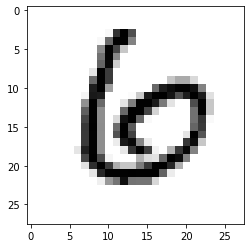

In [ ]:
x_test = x_test.reshape(10000,28,28)
plt.imshow(x_test[11], cmap=plt.cm.binary)

S'observa que en el 11 tenim la imatge d'un 6.

In [ ]:
x_test = x_test.reshape(10000,784)
predictions = model.predict(x_test)

Ara puc mirar a la posició 11 a quin número li dona més probabilitats

In [ ]:
print(predictions[11]) #printejo totes les prediccions
print(np.argmax(predictions[11]))

[0.06033864 0.01968632 0.26609975 0.02995266 0.03450093 0.06145741
 0.39199662 0.01219927 0.11124647 0.01252194]
6
